# Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
import warnings
warnings.filterwarnings('ignore')
#Importing Libraries
import numpy as np 
import pandas as pd
# For Visualisation-import ploting libraries
import matplotlib.pyplot as plt
# import matplotlib.style
# plt.style.use('classic')
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
# sns.set(context="notebook", palette="Spectral", style = 'darkgrid',
#         font_scale = 1.5, color_codes=True)

# To Scale our data/ For preprocessing the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

#To check Multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#To Split data

from sklearn.model_selection import train_test_split,GridSearchCV

# Import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\Neha Mishra\\Downloads')

In [3]:
# Read Data
Election_df = pd.read_csv('election.csv')

In [4]:
Election_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
# Check tail of the data
Election_df.tail(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1515,1516,Conservative,82,2,2,2,1,11,2,female
1516,1517,Labour,30,3,4,4,2,4,2,male
1517,1518,Labour,76,4,3,2,2,11,2,male
1518,1519,Labour,50,3,4,4,2,5,2,male
1519,1520,Conservative,35,3,4,4,2,8,2,male
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [6]:
# Data Inspection (Dimension)
Election_df.shape

(1525, 10)

In [7]:
# Data Structure
Election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


# For a given dataset: we have
No Missing values found. Age feature is the only continuous variable. 2 variables: vote and gender is a Nominal variable. 6 variables: 'economic.cond.national','economic.cond.household','political.knowledge','Blair','Hague'and 'Europe' is an ordinal variable. So out of 9 features, we have 8 categorical features and one numerical features.

# Descriptive Statistics

In [8]:
# Number Summary
round(Election_df.describe(),5)

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000
mean,763.00000,54.18230,3.24590,3.14033,3.33443,2.74689,6.72852,1.54230
std,440.37389,15.71121,0.88097,0.92995,1.17482,1.23070,3.29754,1.08331
min,1.00000,24.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
25%,382.00000,41.00000,3.00000,3.00000,2.00000,2.00000,4.00000,0.00000
50%,763.00000,53.00000,3.00000,3.00000,4.00000,2.00000,6.00000,2.00000
75%,1144.00000,67.00000,4.00000,4.00000,4.00000,4.00000,10.00000,2.00000
max,1525.00000,93.00000,5.00000,5.00000,5.00000,5.00000,11.00000,3.00000


In [9]:
# Number Summary for object data type:
Election_df[['vote','gender']].describe()

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


age: Minimum age is 24; Maximum age is 93; Avg age is 54.18; Age feature has some amount of skewness present.
vote : Majority of the electors choose to vote Labour party: 1063 out of 1525.
gender: Female voters found to be more compared to male voters: 812 female out of 1525.


In [11]:
# Check for Missing Values
Election_df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no missing values for a given dataset Since we do not have an unique identifier, there is no neccessary to check for duplicate values.

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

# Univariate Analysis

In [12]:
#skewness of the data
Election_df['age'].skew()

0.14462077228942483

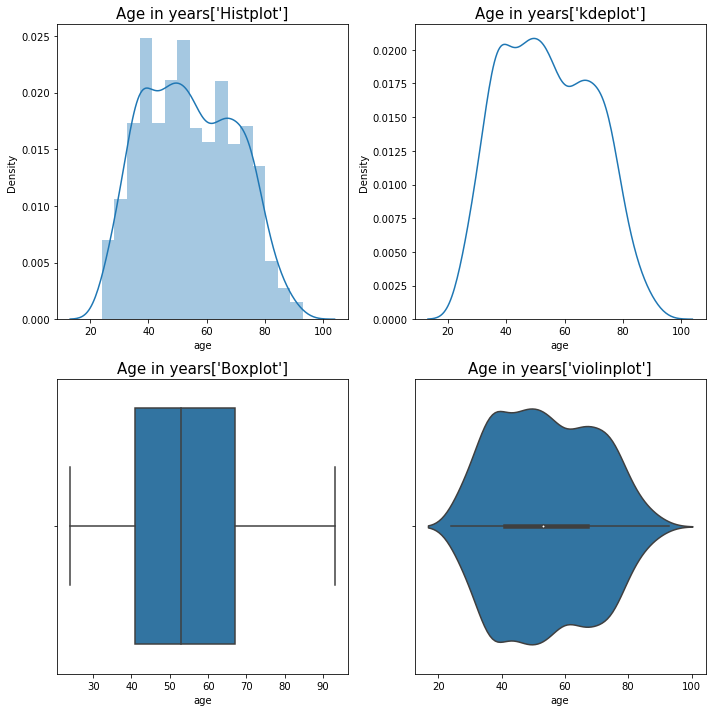

In [13]:
#Univariate Analysis for Numerical variable 'Age' using histogram, kdeplot,Boxplot and violinplot.

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 10)

a = sns.distplot(Election_df['age'] , ax=axes[0][0])
a.set_title("Age in years['Histplot']",fontsize=15)

a = sns.kdeplot(Election_df['age'] , ax=axes[0][1])
a.set_title("Age in years['kdeplot']",fontsize=15)

a = sns.boxplot(Election_df['age'] , ax=axes[1][0])
a.set_title("Age in years['Boxplot']",fontsize=15)

a = sns.violinplot(Election_df['age'] , ax=axes[1][1])
a.set_title("Age in years['violinplot']",fontsize=15)

plt.tight_layout()
plt.show()

Age feature skewness is 0.15 which is between 0 and 0.5, the data is fairly symmetrical.

Age feature has no outliers.

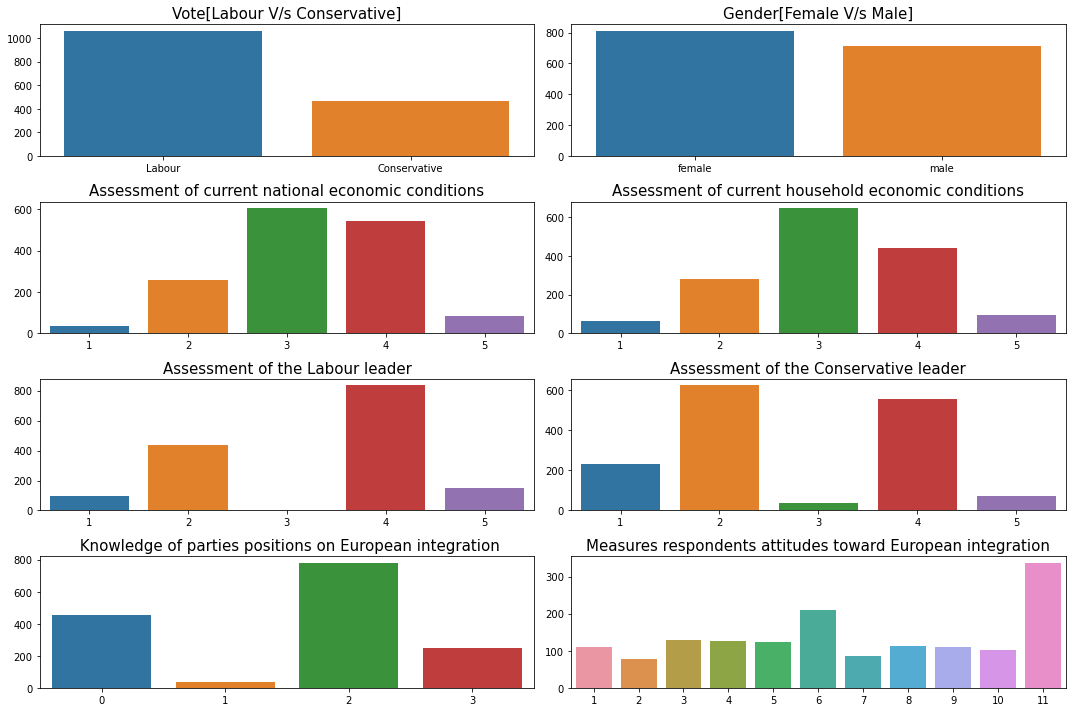

In [14]:
#Univariate Analysis for Nominal variables 'gender and vote' using barplot
#Univariate Analysis for 6 Ordinal variable  using barplot

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 10)

a = sns.barplot(Election_df.vote.value_counts().index, Election_df.vote.value_counts().values, ax=axes[0][0])
a.set_title("Vote[Labour V/s Conservative]",fontsize=15)

a = sns.barplot(Election_df.gender.value_counts().index, Election_df.gender.value_counts().values, ax=axes[0][1])
a.set_title("Gender[Female V/s Male]",fontsize=15)

a = sns.barplot(Election_df['economic.cond.national'].value_counts().index, Election_df['economic.cond.national'].value_counts().values, ax=axes[1][0])
a.set_title("Assessment of current national economic conditions",fontsize=15)

a = sns.barplot(Election_df['economic.cond.household'].value_counts().index, Election_df['economic.cond.household'].value_counts().values, ax=axes[1][1])
a.set_title("Assessment of current household economic conditions",fontsize=15)

a = sns.barplot(Election_df.Blair.value_counts().index, Election_df.Blair.value_counts().values, ax=axes[2][0])
a.set_title("Assessment of the Labour leader",fontsize=15)

a = sns.barplot(Election_df.Hague.value_counts().index, Election_df.Hague.value_counts().values, ax=axes[2][1])
a.set_title("Assessment of the Conservative leader",fontsize=15)

a = sns.barplot(Election_df['political.knowledge'].value_counts().index, Election_df['political.knowledge'].value_counts().values, ax=axes[3][0])
a.set_title(" Knowledge of parties positions on European integration",fontsize=15)

a = sns.barplot(Election_df.Europe.value_counts().index, Election_df.Europe.value_counts().values, ax=axes[3][1])
a.set_title("Measures respondents attitudes toward European integration",fontsize=15)

plt.tight_layout()
plt.show()


# Geting unique counts of all Categorical Variables

In [15]:
for column in Election_df[['vote', 'gender','economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'political.knowledge', 'Europe']]:
    print(column.upper(),': ',Election_df[column].nunique())
    print(Election_df[column].value_counts().sort_index())
    print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
female    812
male      713
Name: gender, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
2    257
3    607
4    542
5     82
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
2    280
3    648
4    440
5     92
Name: economic.cond.household, dtype: int64


BLAIR :  5
1     97
2    438
3      1
4    836
5    153
Name: Blair, dtype: int64


HAGUE :  5
1    233
2    624
3     37
4    558
5     73
Name: Hague, dtype: int64


POLITICAL.KNOWLEDGE :  4
0    455
1     38
2    782
3    250
Name: political.knowledge, dtype: int64


EUROPE :  11
1     109
2      79
3     129
4     127
5     124
6     209
7      86
8     112
9     111
10    101
11    338
Name: Europe, dtype: int64




# Bi-variate Analysis and Multi-variate Analysis


# Bivariate Analysis One numeric v/s Nominal categorical variables¶



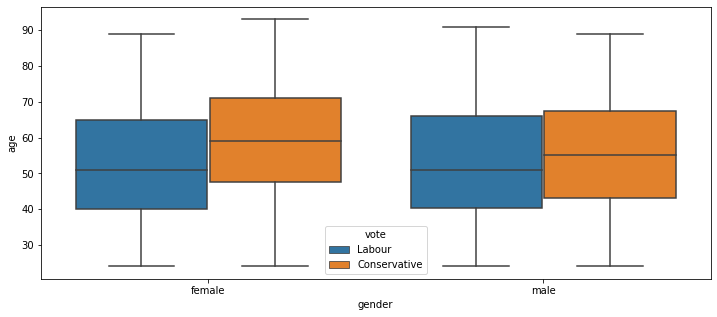

In [16]:
#Age vs Gender and hue=vote:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=Election_df['age'],x=Election_df['gender'],hue=Election_df['vote'],ax=ax)
plt.show()

Avg age group near to 60 choose to elect conservative party whereas avg age group near to 50 choose to elect Labour party.
Middle 50% of the female people who fall under the age group within the range of 40 to 65 choose to elect Labour party.
Middle 50% of the female people who fall under the age group within the range of 50 to 70 choose to elect conservative party.
So we can see from the boxplot that has the age increases people choose to elect conservative party.

# Bivariate Analysis One numeric v/s Ordinal categorical variables

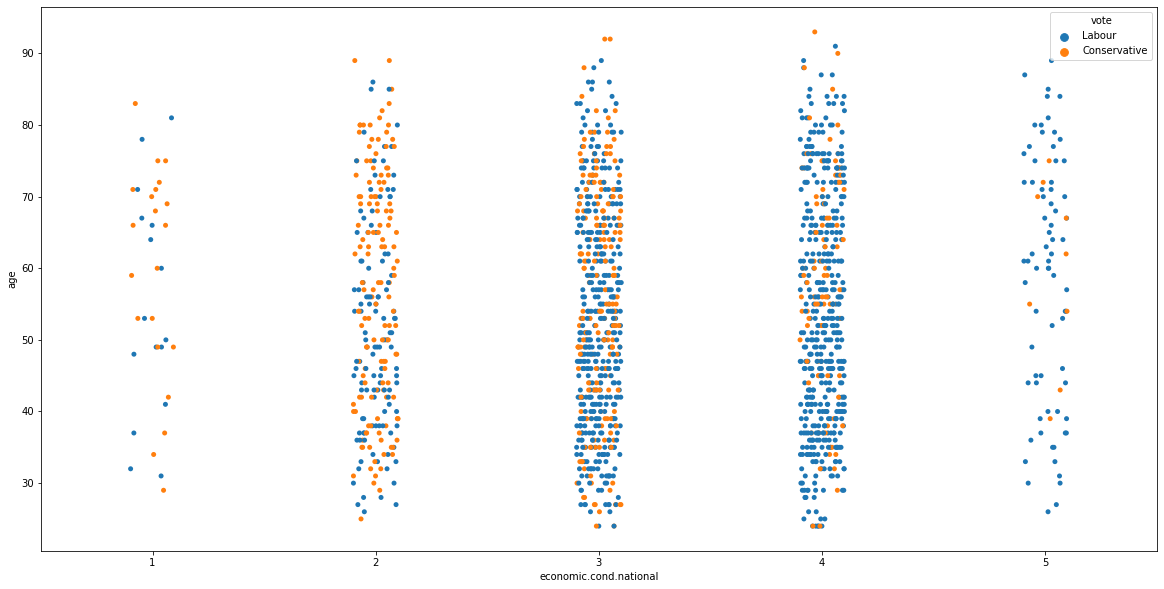

In [17]:
# Age vs economic.cond.national and hue=vote:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=Election_df['age'], x= Election_df['economic.cond.national'],hue=Election_df['vote'],jitter=True, ax=ax) ### Concentration of observations
plt.show()

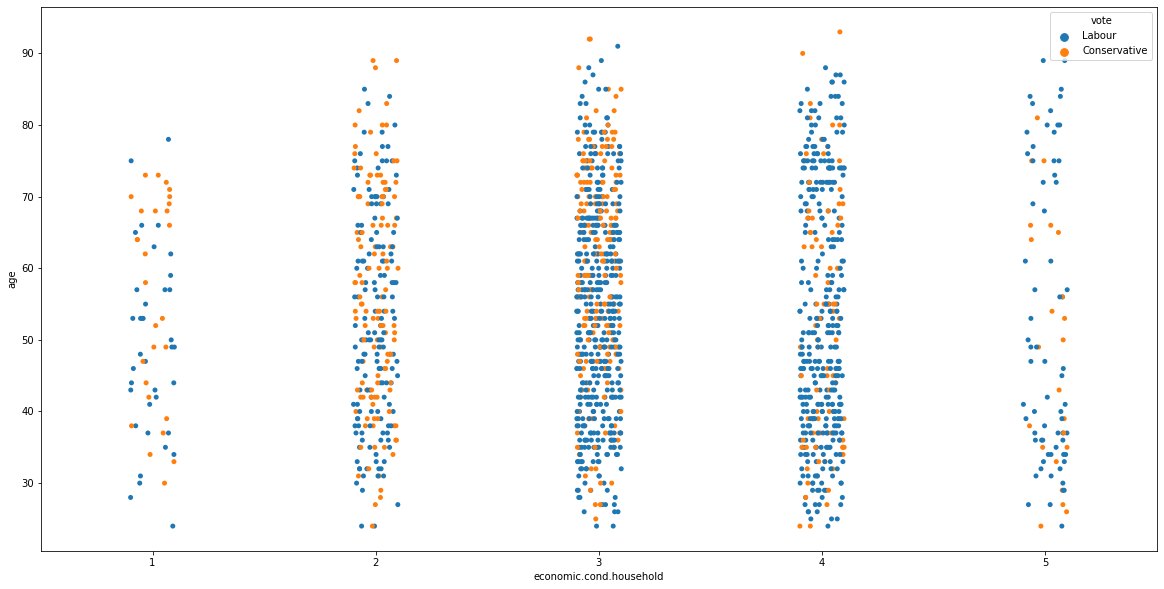

In [18]:
#Age vs economic.cond.household and hue=vote:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=Election_df['age'], x= Election_df['economic.cond.household'],hue=Election_df['vote'],jitter=True, ax=ax) ### Concentration of observations
plt.show()

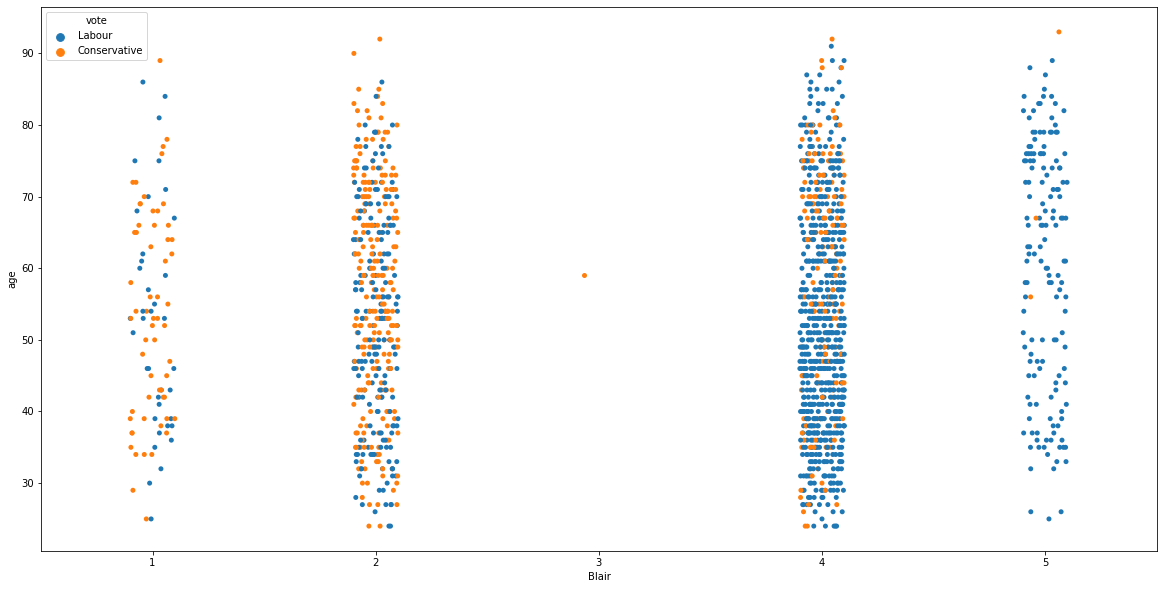

In [19]:
#Age vs Blair and hue=vote:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=Election_df['age'], x= Election_df['Blair'],hue=Election_df['vote'],jitter=True, ax=ax) ### Concentration of observations
plt.show()

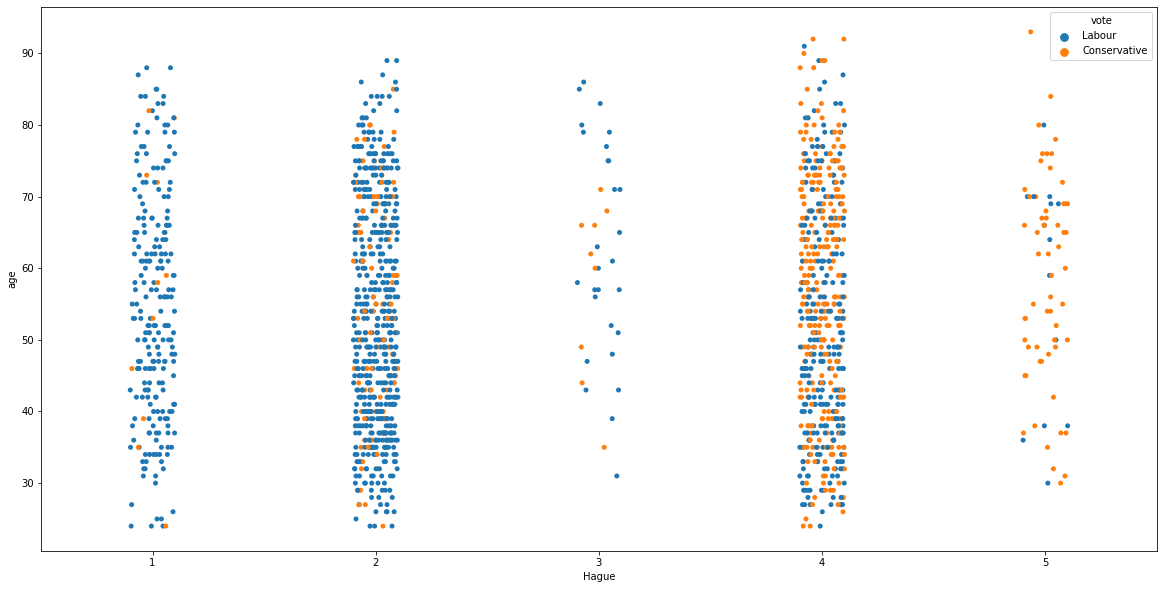

In [20]:
#Age vs hague and hue=vote:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=Election_df['age'], x= Election_df['Hague'],hue=Election_df['vote'],jitter=True, ax=ax) ### Concentration of observations
plt.show()

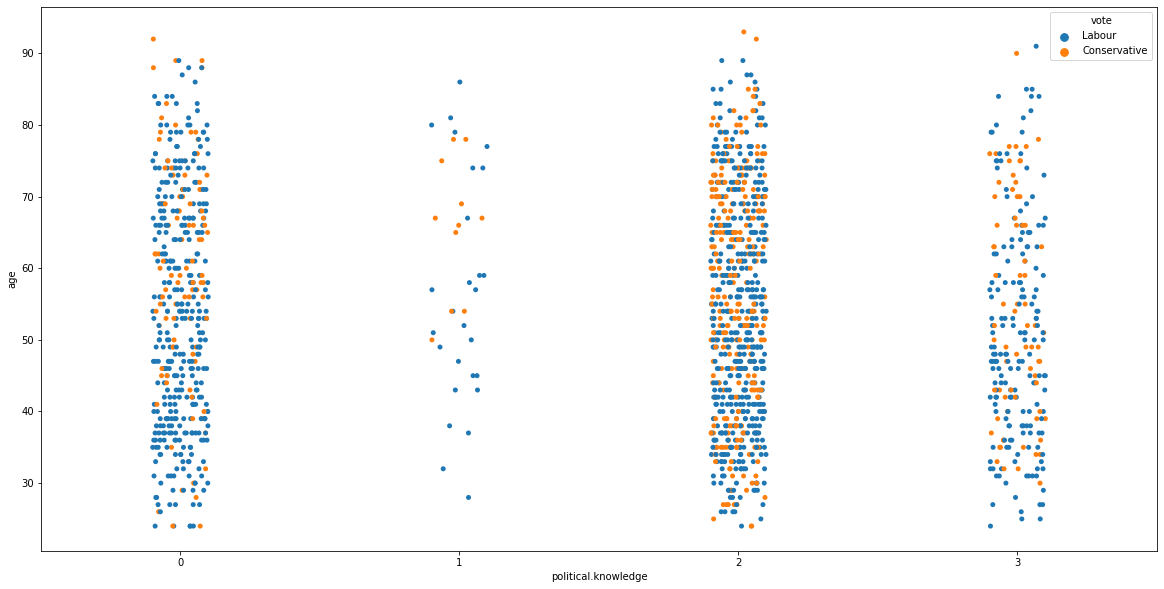

In [21]:
#Age vs political.knowledge and hue=vote:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=Election_df['age'], x= Election_df['political.knowledge'],hue=Election_df['vote'],jitter=True, ax=ax) ### Concentration of observations
plt.show()

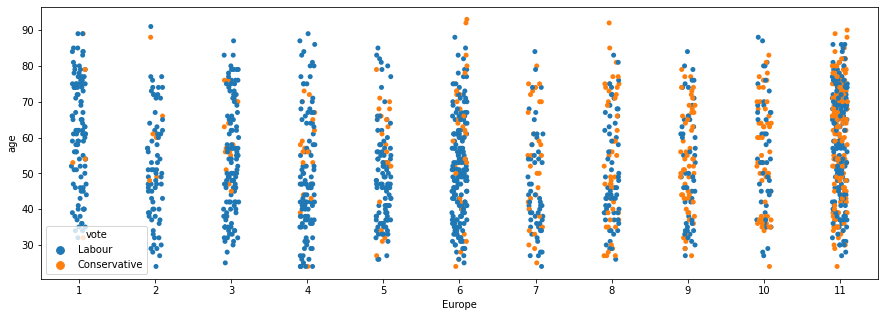

In [22]:
#Age vs Europe and hue=vote:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y=Election_df['age'], x= Election_df['Europe'],hue=Election_df['vote'], ax=ax) ### Concentration of observations
plt.show()

# Count of Electors elected for Labour party and conservative party in the Target Column

In [23]:
# Let us look at the target column which is 'vote' to understand how the data is distributed amongst the various values
Election_df.groupby(['vote']).count()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,,
Conservative,462,462,462,462,462,462,462,462,462
Labour,1063,1063,1063,1063,1063,1063,1063,1063,1063


In [24]:
Election_df.vote.value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

Distribution of Target variable is 70:30% .Most of the voters elected to labour party. The ratio is almost 1:2 .The model's ability to predict class labour will be more compared to conservative.

# Data Preparation:

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

# Encode the data¶

In [25]:
for feature in Election_df.columns: 
    if Election_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Election_df[feature].unique()))
        print(pd.Categorical(Election_df[feature].unique()).codes)
        Election_df[feature] = pd.Categorical(Election_df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


Scaling We have feature age in years with different unit weight and the remaining is of ratings ranging from 1 to 5; 1 to 11 and 0 to 3. Hence scaling is required for certain models to get accurate results. Scaled data can be done only for training set, for test set scaling is not required in the real world data will not be scaled, need to be passed through the model with whatever measurements they come in.

In [26]:
# Copy all the predictor variables into X dataframe
X = Election_df.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = Election_df['vote']

In [27]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [28]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1067, 9)
Number of rows and columns of the training set for the dependent variable: (1067,)
Number of rows and columns of the test set for the independent variables: (458, 9)
Number of rows and columns of the test set for the dependent variable: (458,)


In [29]:
y_train.value_counts(1)

1    0.697282
0    0.302718
Name: vote, dtype: float64

In [30]:
y_test.value_counts(1)

1    0.696507
0    0.303493
Name: vote, dtype: float64

# Modelling

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

# Logistic Regression Model

# Applying GridSearchCV for Logistic Regression

In [31]:
# Create parameter grid to identify best parameters for logistic regression model:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','newton-cg','saga','liblinear'],
      'max_iter':[1000,5000,10000],
      'tol':[0.01,0.001,0.0001]
     }

In [32]:
# Create instance for logistic regression
model = LogisticRegression(verbose=True,n_jobs=4)

In [33]:
#Perform gridsearch and fit training dataset into it:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

[LibLinear]

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=4, verbose=True),
             n_jobs=-1,
             param_grid={'max_iter': [1000, 5000, 10000],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga',
                                    'liblinear'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='f1')

In [34]:
#Best parameter/estimators of logistic regression:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)
LR = grid_search.best_estimator_

{'max_iter': 5000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001} 

LogisticRegression(max_iter=5000, n_jobs=4, penalty='l1', solver='liblinear',
                   tol=0.001, verbose=True)


In [35]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = LR.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = LR.predict(X_test)

In [36]:
#Train Data Accuracy
LR_train_acc=LR.score(X_train,y_train) 
round(LR_train_acc,5)

0.82755

In [37]:
#Test Data Accuracy
LR_test_acc=LR.score(X_test,y_test) 
round(LR_test_acc,5)

0.8559

# Linear Discriminant Analysis - LDA¶

In [38]:
#Build LDA Model
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [39]:
pred_class_train = LDA.predict(X_train)# Training Data Class Prediction with a cut-off value of 0.5
pred_class_test = LDA.predict(X_test)# Test Data Class Prediction with a cut-off value of 0.5

In [40]:
LDA_train_acc=LDA.score(X_train,y_train)#Train Data Accuracy 
round(LDA_train_acc,3)

0.828

In [41]:
LDA_test_acc=LDA.score(X_test,y_test) #Test Data Accuracy
round(LDA_test_acc,3)

0.854

On comparing accuracy of both the models LR and LDA models,Test data accuracy of logistic regression is quite good compared to LDA model. Hence Logistic regression perform good for predicting Labour or conservative party.

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

Gaussian Naive Bayes For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

Build a GaussianNB classifier. Then the classifier is trained using training data for which we can use fit() method for training it. After building a classifier,model is ready to make predictions for which we can use predict() method with test set features as its parameters.

In [42]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)  # Build GaussianNB model

GaussianNB()

In [43]:
ytrain_predict_NB = NB_model.predict(X_train)  # Training Data Class Prediction with a cut-off value of 0.5


ytest_predict_NB = NB_model.predict(X_test)  # Test Data Class Prediction with a cut-off value of 0.5

In [44]:
NB_train_acc=NB_model.score(X_train,y_train)  #Train Data Accuracy
round(NB_train_acc,3)

0.827

In [45]:
NB_test_acc=NB_model.score(X_test,y_test) #Test Data Accuracy 
round(NB_test_acc,3) 

0.849

# K-nearest neighbour

In order to have good KNN model, data requires pre-processing to make all independent variables similarly scaled and centred. Hence need to perform z-score on all numeric attributes in models that calculate distance and see the performance for KNN.

In [46]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

By default, value of n_neighbors=5, in order to get best KNN model need to try for different K values

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Misclassification error (MCE) = 1 - Test accuracy score.

Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [47]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.19432314410480345,
 0.16593886462882101,
 0.15283842794759828,
 0.14192139737991272,
 0.12445414847161573,
 0.13318777292576423,
 0.1353711790393013,
 0.13318777292576423,
 0.13100436681222705,
 0.13318777292576423,
 0.13100436681222705,
 0.13318777292576423,
 0.13973799126637554,
 0.13755458515283847,
 0.1353711790393013]

# Plot misclassification error vs k (with k value on X-axis) using matplotlib

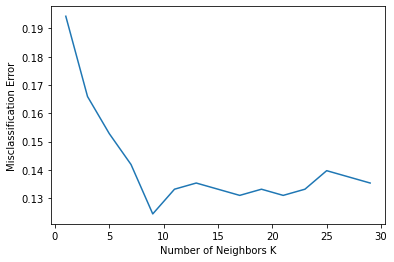

In [48]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 13 it is giving the best test accuracy

In [50]:
KNN_model=KNeighborsClassifier(n_neighbors=13,metric='euclidean')
KNN_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [52]:
ytrain_predict_KNN = KNN_model.predict(X_train_scaled)  # Training Data Class Prediction with a cut-off value of 0.5


ytest_predict_KNN = KNN_model.predict(X_test_scaled)   # Test Data Class Prediction with a cut-off value of 0.5

In [53]:
KNN_train_acc=KNN_model.score(X_train_scaled,y_train) #Train Data Accuracy
round(KNN_train_acc,5)

0.83037

In [54]:
KNN_test_acc=KNN_model.score(X_test_scaled,y_test)   #Test Data Accuracy
round(KNN_test_acc,5)

0.86463

On comparing accuracy of both the models NB and KNN models,Test data accuracy of KNN model for n_neighbour=13 is quite good compared to NB model. Hence KNN model perform good for predicting Labour or conservative party

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting.

# Ensemble RandomForest Classifier

In [55]:
# Create parameter grid to identify best parameters for RandomForest model:
param_grid = {
    'max_depth': [7],
    'max_features': [4],
    'min_samples_leaf': [40],
    'min_samples_split': [100],
    'n_estimators': [501]
}

In [56]:
# Create instance for RandomForest
model_1 = RandomForestClassifier(random_state=27)
#Perform gridsearch and fit training dataset into it:
grid_search_rf = GridSearchCV(estimator = model_1, param_grid = param_grid, cv = 10)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=27),
             param_grid={'max_depth': [7], 'max_features': [4],
                         'min_samples_leaf': [40], 'min_samples_split': [100],
                         'n_estimators': [501]})

In [58]:
print(grid_search_rf.best_params_,'\n')   #Best parameter/estimators of RandomForest:
print(grid_search_rf.best_estimator_)

rfcl = grid_search_rf.best_estimator_

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 501} 

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=40,
                       min_samples_split=100, n_estimators=501,
                       random_state=27)


In [59]:
ytrain_predict_rf = rfcl.predict(X_train)  # Training Data Class Prediction with a cut-off value of 0.5 

ytest_predict_rf = rfcl.predict(X_test)   # Test Data Class Prediction with a cut-off value of 0.5

In [60]:
RF_train_acc=rfcl.score(X_train,y_train) #Train Data Accuracy
round(RF_train_acc,5)

0.82287

In [61]:
RF_test_acc=rfcl.score(X_test,y_test)  #Test Data Accuracy
round(RF_test_acc,5)

0.82533

# Bagging

In [63]:
# Build BaggingClassifier using RandomForest has a base estimator
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=100,random_state=27)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                        max_features=4,
                                                        min_samples_leaf=40,
                                                        min_samples_split=100,
                                                        n_estimators=501,
                                                        random_state=27),
                  n_estimators=100, random_state=27)

In [64]:
ytrain_predict_bagging = Bagging_model.predict(X_train) # Training Data Class Prediction with a cut-off value of 0.5


ytest_predict_bagging = Bagging_model.predict(X_test)  # Test Data Class Prediction with a cut-off value of 0.5

In [65]:
BG_train_acc=Bagging_model.score(X_train,y_train) #Train Data Accuracy
round(BG_train_acc,5)

0.81162

In [66]:
BG_test_acc=Bagging_model.score(X_test,y_test)  #Test Data Accuracy
round(BG_test_acc,5)

0.82969

On comparing accuracy of Random Forest and Bagging models,Test data accuracy of Random Forest model quite good compared to Bagging model. Hence Random Forest model performs well for predicting Labour or conservative party.

# Ensemble Learning - Gradient Boosting

In [67]:
gbcl = GradientBoostingClassifier(n_estimators=100,random_state=27)   # Create instance for GradientBoost classifier model
gbcl = gbcl.fit(X_train, y_train)

In [68]:
ytrain_predict_GB = gbcl.predict(X_train)   # Training Data Class Prediction with a cut-off value of 0.5


ytest_predict_GB = gbcl.predict(X_test)     # Test Data Class Prediction with a cut-off value of 0.5

In [69]:
GB_train_acc=gbcl.score(X_train,y_train)   #Train Data Accuracy
round(GB_train_acc,3)

0.915

In [70]:
GB_test_acc=gbcl.score(X_test,y_test)    #Test Data Accuracy
round(GB_test_acc,3)

0.845

On comparing accuracy of Gradient Boosting and AdaBoost models, Test data accuracy of both the models are almost equal, since the difference between the train and test set is very low for Ada boost compared to Gradient Boost model, Ada Boost model performs well for predicting Labour or conservative party.

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.
Model Evaluation-Logistic Regression

Training set - LR

Accuracy for Logistic Regression model on Testing set is 
 0.856


Classification report for Logistic Regression model on Testing set is 
               precision    recall  f1-score   support

           0       0.81      0.69      0.74       139
           1       0.87      0.93      0.90       319

    accuracy                           0.86       458
   macro avg       0.84      0.81      0.82       458
weighted avg       0.85      0.86      0.85       458



Confusion Matrix for Logistic Regression model on Testing set is


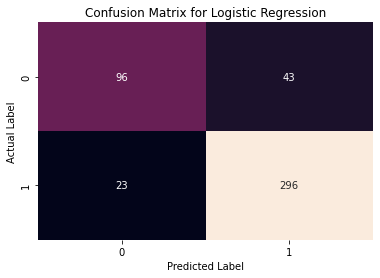

LR_test_precision  0.87
LR_test_recall  0.93
LR_test_f1  0.9


In [109]:
models_names={LR:'Logistic Regression'}

print('Accuracy for {} model on Testing set is'.format(models_names[LR]),'\n',round(accuracy_score(y_test,ytest_predict),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[LR]),'\n',classification_report(y_test,ytest_predict))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[LR]))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LR]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LR_metrics_test=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(LR_metrics_test).transpose()
LR_test_f1=round(df.loc["1"][2],2)
LR_test_recall=round(df.loc["1"][1],2)
LR_test_precision=round(df.loc["1"][0],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

AUC and ROC for the train data -LR

AUC: 0.917


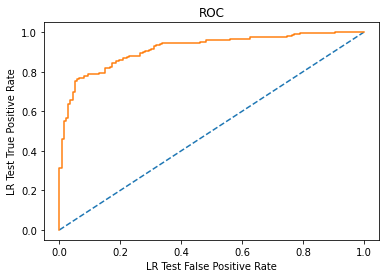

In [110]:
# predict probabilities
ytest_predict_prob=LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob = ytest_predict_prob[:, 1]
# calculate AUC
LR_test_auc = roc_auc_score(y_test, ytest_predict_prob)
print('AUC: %.3f' % LR_test_auc)
# calculate roc curve
LR_test_fpr, LR_test_tpr, LR_test_thresholds = roc_curve(y_test, ytest_predict_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr)
plt.xlabel('LR Test False Positive Rate')
plt.ylabel('LR Test True Positive Rate')
plt.title('ROC')
plt.show()

# Model Evaluation-LDA


Training set - LDA

Accuracy for Linear Discriminant Analysis model on Training set is 
 0.828


Classification report for Linear Discriminant Analysis model on Training set is 
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



Confusion Matrix for Linear Discriminant Analysis model on Training set is


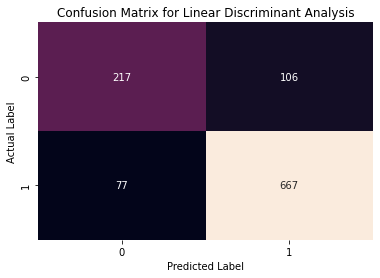

LDA_train_precision  0.86
LDA_train_recall  0.9
LDA_train_f1  0.88


In [112]:
# Predictions on train data with cut-off value 0.5
models_names={LDA:'Linear Discriminant Analysis'}

print('Accuracy for {} model on Training set is'.format(models_names[LDA]),'\n',round(accuracy_score(y_train,pred_class_train),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[LDA]),'\n',classification_report(y_train,pred_class_train))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[LDA]))
sns.heatmap(confusion_matrix(y_train,pred_class_train),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LDA]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LDA_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_f1=round(df.loc["1"][2],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_precision=round(df.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

AUC and ROC for the train data -LDA

AUC: 0.877


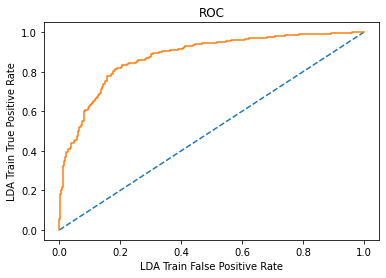

In [113]:
# predict probabilities
pred_prob_train = LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
pred_prob_train = pred_prob_train[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train, pred_prob_train)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train, pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)
plt.xlabel('LDA Train False Positive Rate')
plt.ylabel('LDA Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - LDA

Accuracy for Linear Discriminant Analysis model on Testing set is 
 0.854


Classification report for Linear Discriminant Analysis model on Testing set is 
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       139
           1       0.88      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



Confusion Matrix for Linear Discriminant Analysis model on Testing set is


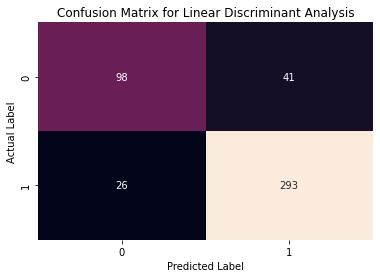

LDA_test_precision  0.88
LDA_test_recall  0.92
LDA_test_f1  0.9


In [114]:
# Predictions on train data with cut-off value 0.5
models_names={LDA:'Linear Discriminant Analysis'}

print('Accuracy for {} model on Testing set is'.format(models_names[LDA]),'\n',round(accuracy_score(y_test,pred_class_test),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[LDA]),'\n',classification_report(y_test,pred_class_test))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[LDA]))
sns.heatmap(confusion_matrix(y_test,pred_class_test),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LDA]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LDA_metrics_test=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(LDA_metrics_test).transpose()
LDA_test_f1=round(df.loc["1"][2],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_precision=round(df.loc["1"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

AUC and ROC for the test data - LDA

AUC: 0.916


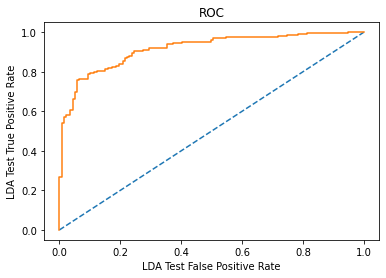

In [115]:
# predict probabilities
pred_prob_test = LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
pred_prob_test = pred_prob_test[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, pred_prob_test)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test, pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.xlabel('LDA Test False Positive Rate')
plt.ylabel('LDA Test True Positive Rate')
plt.title('ROC')
plt.show()

To improve the model results change the cut-off values for maximum accuracy

In [116]:
### Probability prediction for the training and test data

# Training Data Probability Prediction
pred_prob_train1 = LDA.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test1 = LDA.predict_proba(X_test)

0.1 

Accuracy Score 0.747
F1 Score 0.845 

Confusion Matrix


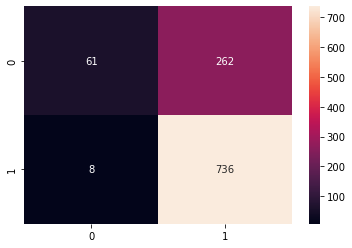

0.2 

Accuracy Score 0.7873
F1 Score 0.8642 

Confusion Matrix


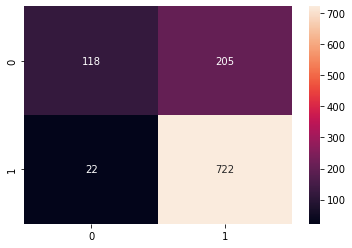

0.3 

Accuracy Score 0.806
F1 Score 0.8717 

Confusion Matrix


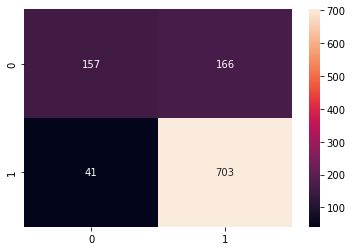

0.4 

Accuracy Score 0.8247
F1 Score 0.8808 

Confusion Matrix


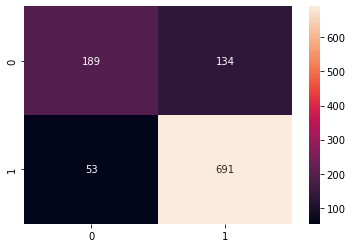

0.5 

Accuracy Score 0.8285
F1 Score 0.8794 

Confusion Matrix


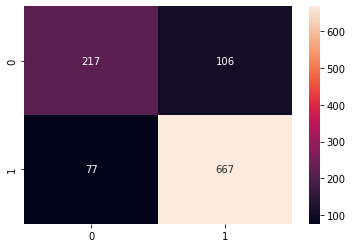

0.6 

Accuracy Score 0.8219
F1 Score 0.8707 

Confusion Matrix


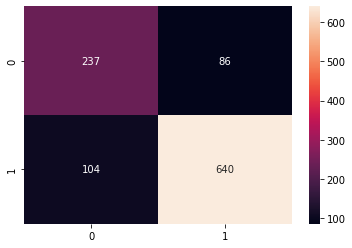

0.7 

Accuracy Score 0.8144
F1 Score 0.8598 

Confusion Matrix


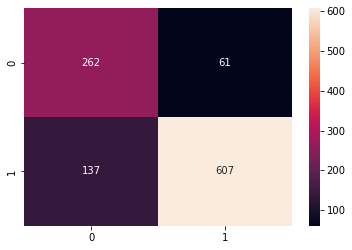

0.8 

Accuracy Score 0.7563
F1 Score 0.8027 

Confusion Matrix


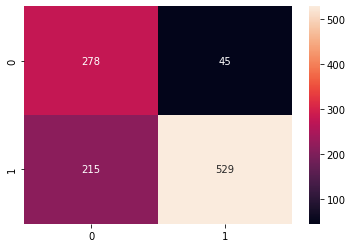

0.9 

Accuracy Score 0.6673
F1 Score 0.7004 

Confusion Matrix


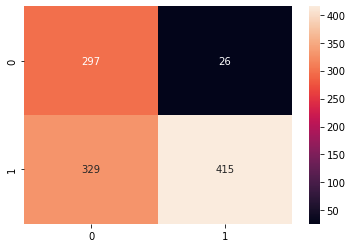

In [117]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train1[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

AUC and ROC for the test data - LDA

AUC: 0.916


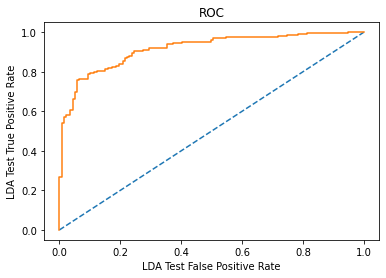

In [80]:
# predict probabilities
pred_prob_test = LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
pred_prob_test = pred_prob_test[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, pred_prob_test)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test, pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)
plt.xlabel('LDA Test False Positive Rate')
plt.ylabel('LDA Test True Positive Rate')
plt.title('ROC')
plt.show()

After performing iterations by changing the probability cut-off; we see that 0.4 and 0.5 gives better accuracy than the rest of the custom cut-off values. But 0.4 cut-off gives us the best 'f1-score'. Hence, we will take the cut-off as 0.4 to get the optimum 'f1' score in order to improve the test set results

In [118]:
#Predicting the classes on the test data with a cut-off value of 0.4

data_pred_custom_cutoff=[] #defining an empty list
for i in range(0,len(pred_prob_test1[:,1])):#defining a loop for the length of the test data
    if np.array(pred_prob_test1[:,1])[i]>0.4: #issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1 #if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0 #if the probability values are less than the custom cutoff then the value should be 0
    data_pred_custom_cutoff.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us

Accuracy for Linear Discriminant Analysis model on Testing set with cut-off value 0.4 is 
 0.847


Classification report for Linear Discriminant Analysis model on Testing set with cut-off value 0.4 is 
               precision    recall  f1-score   support

           0       0.82      0.63      0.72       139
           1       0.85      0.94      0.90       319

    accuracy                           0.85       458
   macro avg       0.84      0.79      0.81       458
weighted avg       0.84      0.85      0.84       458



Confusion Matrix for Linear Discriminant Analysis model on Testing set with cut-off value 0.4 is


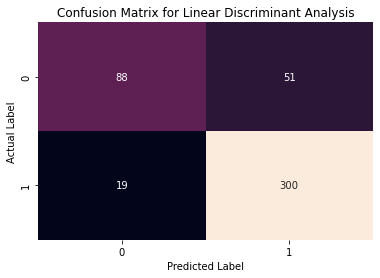

LDA_test_precision_new  0.85
LDA_test_recall_new  0.94
LDA_test_f1_new  0.9


In [119]:
# Predictions on test data with cut-off value 0.4
models_names={LDA:'Linear Discriminant Analysis'}

print('Accuracy for {} model on Testing set with cut-off value 0.4 is'.format(models_names[LDA]),'\n',round(accuracy_score(y_test,data_pred_custom_cutoff),3))
print('\n')
print('Classification report for {} model on Testing set with cut-off value 0.4 is'.format(models_names[LDA]),'\n',classification_report(y_test,data_pred_custom_cutoff))
print('\n')
print('Confusion Matrix for {} model on Testing set with cut-off value 0.4 is'.format(models_names[LDA]))
sns.heatmap(confusion_matrix(y_test,data_pred_custom_cutoff),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[LDA]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

LDA_metrics_test_new=classification_report(y_test, data_pred_custom_cutoff,output_dict=True)
df=pd.DataFrame(LDA_metrics_test_new).transpose()
LDA_test_f1_new=round(df.loc["1"][2],2)
LDA_test_recall_new=round(df.loc["1"][1],2)
LDA_test_precision_new=round(df.loc["1"][0],2)
print ('LDA_test_precision_new ',LDA_test_precision_new)
print ('LDA_test_recall_new ',LDA_test_recall_new)
print ('LDA_test_f1_new ',LDA_test_f1_new)

In [121]:
LDA_test_acc_new = round(accuracy_score(y_test,data_pred_custom_cutoff),3)
LDA_test_acc_new

0.847

Training and Test set results are almost similar, and with the overall measures high, the model is a good model

In [122]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    {'LR Train'     : [LR_train_acc,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
     'LR Test'      : [LR_test_acc,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
     'LDA Train'    : [LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
     'LDA Test[0.5]': [LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
     'LDA Test[0.4]': [LDA_test_acc_new,np.nan,LDA_test_recall_new,LDA_test_precision_new,LDA_test_f1_new]
    },index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test[0.5],LDA Test[0.4]
Accuracy,0.83,0.86,0.83,0.85,0.85
AUC,0.88,0.92,0.88,0.92,NaN
Recall,0.90,0.93,0.90,0.92,0.94
Precision,0.86,0.87,0.86,0.88,0.85
F1 Score,0.88,0.90,0.88,0.90,0.90


# Model Evaluation- Naive Bayes


Training set - NB

Accuracy for Naive Bayes model on Training set is 
 0.827


Classification report for Naive Bayes model on Training set is 
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       323
           1       0.87      0.88      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067



Confusion Matrix for Naive Bayes model on Training set is


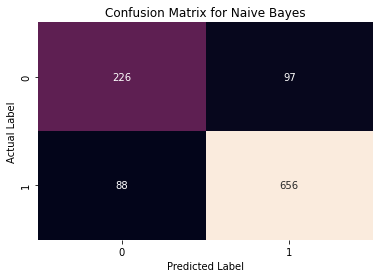

NB_train_precision  0.87
NB_train_recall  0.88
NB_train_f1  0.88


In [123]:
models_names={NB_model:'Naive Bayes'}

print('Accuracy for {} model on Training set is'.format(models_names[NB_model]),'\n',round(accuracy_score(y_train,ytrain_predict_NB),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[NB_model]),'\n',classification_report(y_train,ytrain_predict_NB))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[NB_model]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_NB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[NB_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

NB_metrics=classification_report(y_train, ytrain_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_precision=round(df.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

AUC and ROC for the train data - NB

AUC: 0.876


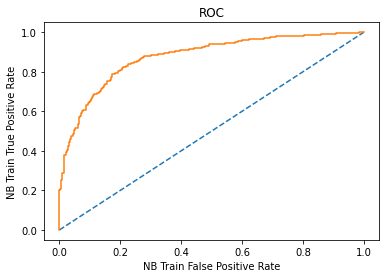

In [124]:
# predict probabilities
ytrain_predict_prob_NB =NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob_NB = ytrain_predict_prob_NB[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, ytrain_predict_prob_NB)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, ytrain_predict_prob_NB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)
plt.xlabel('NB Train False Positive Rate')
plt.ylabel('NB Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - NB

Accuracy for Naive Bayes model on Testing set is 
 0.849


Classification report for Naive Bayes model on Testing set is 
               precision    recall  f1-score   support

           0       0.76      0.73      0.75       139
           1       0.89      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.82      0.82       458
weighted avg       0.85      0.85      0.85       458



Confusion Matrix for Naive Bayes model on Testing set is


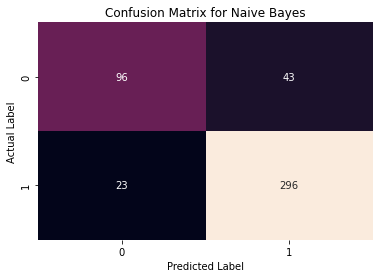

NB_test_precision  0.89
NB_test_recall  0.9
NB_test_f1  0.89


In [125]:
models_names={NB_model:'Naive Bayes'}

print('Accuracy for {} model on Testing set is'.format(models_names[NB_model]),'\n',round(accuracy_score(y_test,ytest_predict_NB),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[NB_model]),'\n',classification_report(y_test,ytest_predict_NB))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[NB_model]))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[NB_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

NB_metrics_test=classification_report(y_test, ytest_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics_test).transpose()
NB_test_f1=round(df.loc["1"][2],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_precision=round(df.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

AUC and ROC for the test data - NB

AUC: 0.912


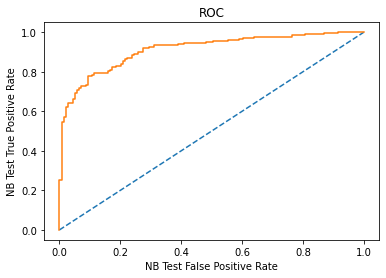

In [126]:
# predict probabilities
ytest_predict_prob_NB=NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob_NB = ytest_predict_prob_NB[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, ytest_predict_prob_NB)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, ytest_predict_prob_NB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)
plt.xlabel('NB Test False Positive Rate')
plt.ylabel('NB Test True Positive Rate')
plt.title('ROC')
plt.show()

To improve the model results change the cut-off values for maximum accuracy

In [127]:
### Probability prediction for the training and test data

# Training Data Probability Prediction
pred_prob_train_NB = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_NB = NB_model.predict_proba(X_test)

0.1 

Accuracy Score 0.7713
F1 Score 0.8553 

Confusion Matrix


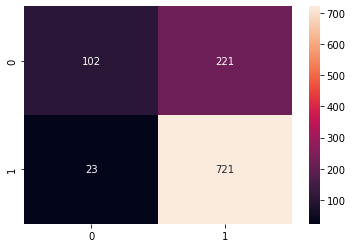

0.2 

Accuracy Score 0.7948
F1 Score 0.8652 

Confusion Matrix


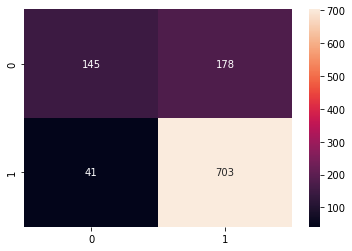

0.3 

Accuracy Score 0.8069
F1 Score 0.869 

Confusion Matrix


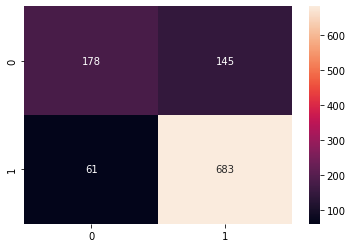

0.4 

Accuracy Score 0.8172
F1 Score 0.8728 

Confusion Matrix


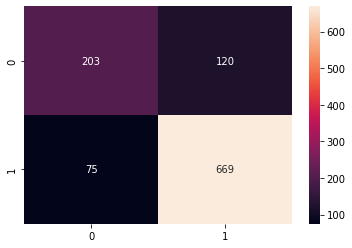

0.5 

Accuracy Score 0.8266
F1 Score 0.8764 

Confusion Matrix


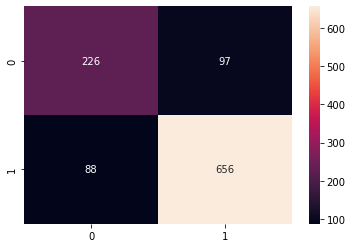

0.6 

Accuracy Score 0.8201
F1 Score 0.8685 

Confusion Matrix


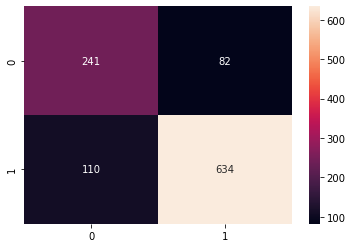

0.7 

Accuracy Score 0.8097
F1 Score 0.8567 

Confusion Matrix


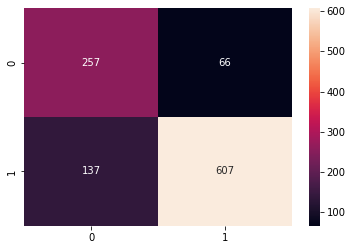

0.8 

Accuracy Score 0.7751
F1 Score 0.8222 

Confusion Matrix


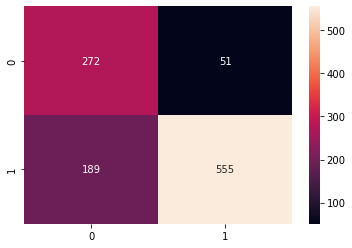

0.9 

Accuracy Score 0.7235
F1 Score 0.7646 

Confusion Matrix


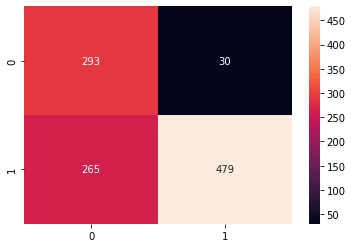

In [128]:
for j in np.arange(0.1,1,0.1):
    custom_prob_NB = j #defining the cut-off value of our choice
    custom_cutoff_data_NB=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_NB[:,1])[i] > custom_prob_NB:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data_NB.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data_NB),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data_NB),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data_NB),annot=True,fmt='.4g'),'\n\n'
    plt.show();

After performing iterations by changing the probability cut-off; we see that 0.4 and 0.5 gives better accuracy than the rest of the custom cut-off values. But 0.4 cut-off gives us the best 'f1-score'. Hence, we will take the cut-off as 0.4 to get the optimum 'f1' score in order to improve the test set results

In [129]:

#Predicting the classes on the test data with a cut-off value of 0.4

data_pred_custom_cutoff_NB=[] #defining an empty list
for i in range(0,len(pred_prob_test_NB[:,1])):#defining a loop for the length of the test data
    if np.array(pred_prob_test_NB[:,1])[i]>0.4: #issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1 #if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0 #if the probability values are less than the custom cutoff then the value should be 0
    data_pred_custom_cutoff_NB.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us

Accuracy for Naive Bayes model on Testing set with cut-off value 0.4 is 
 0.858


Classification report for Naive Bayes model on Testing set with cut-off value 0.4 is 
               precision    recall  f1-score   support

           0       0.82      0.68      0.74       139
           1       0.87      0.94      0.90       319

    accuracy                           0.86       458
   macro avg       0.85      0.81      0.82       458
weighted avg       0.86      0.86      0.85       458



Confusion Matrix for Naive Bayes model on Testing set with cut-off value 0.4 is


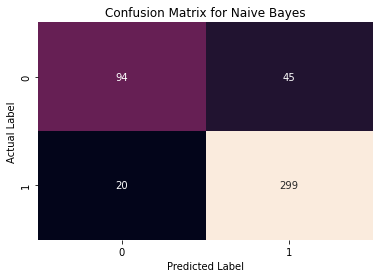

NB_test_precision_new  0.87
NB_test_recall_new  0.94
NB_test_f1_new  0.9


In [130]:
# Predictions on test data with cut-off value 0.4
models_names={NB_model:'Naive Bayes'}

print('Accuracy for {} model on Testing set with cut-off value 0.4 is'.format(models_names[NB_model]),'\n',round(accuracy_score(y_test,data_pred_custom_cutoff_NB),3))
print('\n')
print('Classification report for {} model on Testing set with cut-off value 0.4 is'.format(models_names[NB_model]),'\n',classification_report(y_test,data_pred_custom_cutoff_NB))
print('\n')
print('Confusion Matrix for {} model on Testing set with cut-off value 0.4 is'.format(models_names[NB_model]))
sns.heatmap(confusion_matrix(y_test,data_pred_custom_cutoff_NB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[NB_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

NB_metrics_test_new=classification_report(y_test, data_pred_custom_cutoff_NB,output_dict=True)
df=pd.DataFrame(NB_metrics_test_new).transpose()
NB_test_f1_new=round(df.loc["1"][2],2)
NB_test_recall_new=round(df.loc["1"][1],2)
NB_test_precision_new=round(df.loc["1"][0],2)
print ('NB_test_precision_new ',NB_test_precision_new)
print ('NB_test_recall_new ',NB_test_recall_new)
print ('NB_test_f1_new ',NB_test_f1_new)

In [131]:
NB_test_acc_new = round(accuracy_score(y_test,data_pred_custom_cutoff_NB),3)
NB_test_acc_new

0.858

# Model Evaluation- KNN Model


Training set - KNN

Accuracy for K-nearest neighbour model on Training set is 
 0.83


Classification report for K-nearest neighbour model on Training set is 
               precision    recall  f1-score   support

           0       0.74      0.67      0.71       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067



Confusion Matrix for K-nearest neighbour model on Training set is


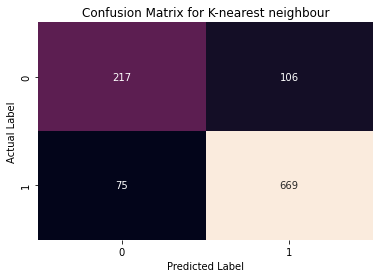

KNN_train_precision  0.86
KNN_train_recall  0.9
KNN_train_f1  0.88


In [132]:
models_names={KNN_model:'K-nearest neighbour'}

print('Accuracy for {} model on Training set is'.format(models_names[KNN_model]),'\n',round(accuracy_score(y_train,ytrain_predict_KNN),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[KNN_model]),'\n',classification_report(y_train,ytrain_predict_KNN))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[KNN_model]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_KNN),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[KNN_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

KNN_metrics=classification_report(y_train, ytrain_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(df.loc["1"][2],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_precision=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

AUC and ROC for the train data - KNN

AUC: 0.907


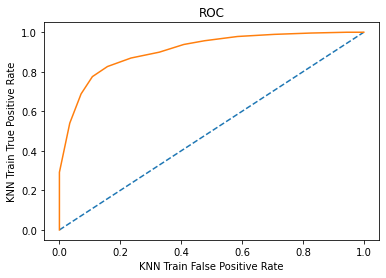

In [133]:
# predict probabilities
ytrain_predict_prob_KNN =KNN_model.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
ytrain_predict_prob_KNN = ytrain_predict_prob_KNN[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train, ytrain_predict_prob_KNN)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train, ytrain_predict_prob_KNN)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)
plt.xlabel('KNN Train False Positive Rate')
plt.ylabel('KNN Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - KNN

Accuracy for K-nearest neighbour model on Test set is 
 0.865


Classification report for K-nearest neighbour model on Test set is 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       139
           1       0.89      0.92      0.90       319

    accuracy                           0.86       458
   macro avg       0.84      0.83      0.84       458
weighted avg       0.86      0.86      0.86       458



Confusion Matrix for K-nearest neighbour model on Test set is


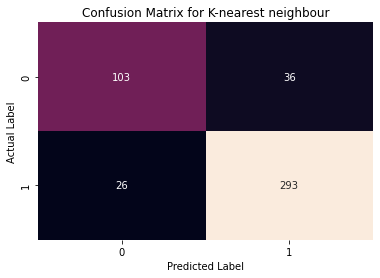

KNN_test_precision  0.89
KNN_test_recall  0.92
KNN_test_f1  0.9


In [135]:
models_names={KNN_model:'K-nearest neighbour'}

print('Accuracy for {} model on Test set is'.format(models_names[KNN_model]),'\n',round(accuracy_score(y_test,ytest_predict_KNN),3))
print('\n')
print('Classification report for {} model on Test set is'.format(models_names[KNN_model]),'\n',classification_report(y_test,ytest_predict_KNN))
print('\n')
print('Confusion Matrix for {} model on Test set is'.format(models_names[KNN_model]))
sns.heatmap(confusion_matrix(y_test,ytest_predict_KNN),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[KNN_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

KNN_metrics=classification_report(y_test, ytest_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_f1=round(df.loc["1"][2],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_precision=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

AUC and ROC for the test data - KNN

AUC: 0.896


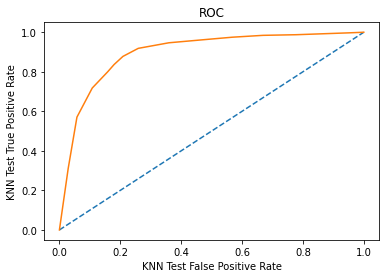

In [136]:
# predict probabilities
ytest_predict_prob_KNN =KNN_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
ytest_predict_prob_KNN = ytest_predict_prob_KNN[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, ytest_predict_prob_KNN)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, ytest_predict_prob_KNN)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)
plt.xlabel('KNN Test False Positive Rate')
plt.ylabel('KNN Test True Positive Rate')
plt.title('ROC')
plt.show()

raining and Test set results are almost similar, and with the overall measures high, the model is a good model.

In [137]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame(
    {'NB Train'     : [NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
     'NB Test[0.5]'      : [NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
     'NB Test[0.4]'    : [NB_test_acc_new,np.nan,NB_test_recall_new,NB_test_precision_new,NB_test_f1_new],
     'KNN Train': [KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
     'KNN Test': [KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1]
    },index=index)
round(data,2)

,NB Train,NB Test[0.5],NB Test[0.4],KNN Train,KNN Test
Accuracy,0.83,0.85,0.86,0.83,0.86
AUC,0.88,0.91,NaN,0.91,0.90
Recall,0.88,0.90,0.94,0.90,0.92
Precision,0.87,0.89,0.87,0.86,0.89
F1 Score,0.88,0.89,0.90,0.88,0.90


# Model Evaluation Random-Forest


Training set - Random Forest

Accuracy for RandomForestClassifier model on Training set is 
 0.823


Classification report for RandomForestClassifier model on Training set is 
               precision    recall  f1-score   support

           0       0.78      0.57      0.66       323
           1       0.83      0.93      0.88       744

    accuracy                           0.82      1067
   macro avg       0.81      0.75      0.77      1067
weighted avg       0.82      0.82      0.81      1067



Confusion Matrix for RandomForestClassifier model on Training set is


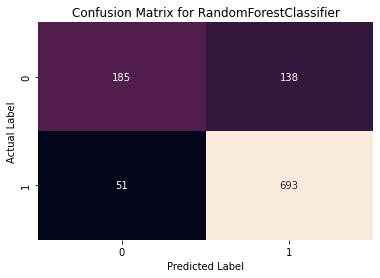

RF_train_precision  0.83
RF_train_recall  0.93
RF_train_f1  0.88


In [138]:
models_names={rfcl:'RandomForestClassifier'}

print('Accuracy for {} model on Training set is'.format(models_names[rfcl]),'\n',round(accuracy_score(y_train,ytrain_predict_rf),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[rfcl]),'\n',classification_report(y_train,ytrain_predict_rf))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_rf),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

RF_metrics=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(RF_metrics).transpose()
RF_train_f1=round(df.loc["1"][2],2)
RF_train_recall=round(df.loc["1"][1],2)
RF_train_precision=round(df.loc["1"][0],2)
print ('RF_train_precision ',RF_train_precision)
print ('RF_train_recall ',RF_train_recall)
print ('RF_train_f1 ',RF_train_f1)

AUC and ROC for the train data -RF

AUC: 0.890


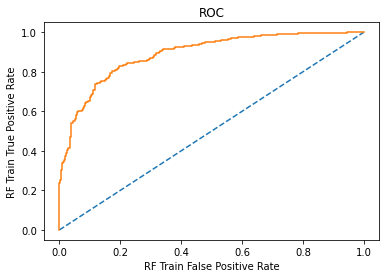

In [139]:
# predict probabilities
ytrain_predict_prob_rf=rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob_rf = ytrain_predict_prob_rf[:, 1]
# calculate AUC
RF_train_auc = roc_auc_score(y_train, ytrain_predict_prob_rf)
print('AUC: %.3f' % RF_train_auc)
# calculate roc curve
RF_train_fpr, RF_train_tpr, RF_train_thresholds = roc_curve(y_train, ytrain_predict_prob_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_train_fpr, RF_train_tpr)
plt.xlabel('RF Train False Positive Rate')
plt.ylabel('RF Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - RandomForest

Accuracy for RandomForestClassifier model on Test set is 
 0.825


Classification report for RandomForestClassifier model on Test set is 
               precision    recall  f1-score   support

           0       0.82      0.55      0.66       139
           1       0.83      0.95      0.88       319

    accuracy                           0.83       458
   macro avg       0.82      0.75      0.77       458
weighted avg       0.82      0.83      0.81       458



Confusion Matrix for RandomForestClassifier model on Testing set is


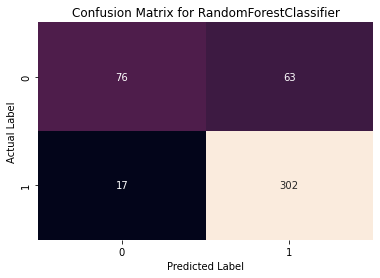

RF_test_precision  0.83
RF_test_recall  0.95
RF_test_f1  0.88


In [140]:
models_names={rfcl:'RandomForestClassifier'}

print('Accuracy for {} model on Test set is'.format(models_names[rfcl]),'\n',round(accuracy_score(y_test,ytest_predict_rf),3))
print('\n')
print('Classification report for {} model on Test set is'.format(models_names[rfcl]),'\n',classification_report(y_test,ytest_predict_rf))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[rfcl]))
sns.heatmap(confusion_matrix(y_test,ytest_predict_rf),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

RF_metrics_test=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(RF_metrics_test).transpose()
RF_test_f1=round(df.loc["1"][2],2)
RF_test_recall=round(df.loc["1"][1],2)
RF_test_precision=round(df.loc["1"][0],2)
print ('RF_test_precision ',RF_test_precision)
print ('RF_test_recall ',RF_test_recall)
print ('RF_test_f1 ',RF_test_f1)

AUC and ROC for the test data RF

AUC: 0.900


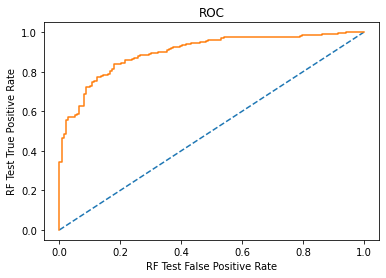

In [141]:
# predict probabilities
ytest_predict_prob_rf=rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob_rf = ytest_predict_prob_rf[:, 1]
# calculate AUC
RF_test_auc = roc_auc_score(y_test, ytest_predict_prob_rf)
print('AUC: %.3f' % RF_test_auc)
# calculate roc curve
RF_test_fpr, RF_test_tpr, RF_test_thresholds = roc_curve(y_test, ytest_predict_prob_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr, RF_test_tpr)
plt.xlabel('RF Test False Positive Rate')
plt.ylabel('RF Test True Positive Rate')
plt.title('ROC')
plt.show()

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Model Evaluation Bagging using base estimator has RF
Training set - Bagging

Accuracy for BaggingClassifier model on Training set is 
 0.812


Classification report for BaggingClassifier model on Training set is 
               precision    recall  f1-score   support

           0       0.81      0.50      0.62       323
           1       0.81      0.95      0.88       744

    accuracy                           0.81      1067
   macro avg       0.81      0.72      0.75      1067
weighted avg       0.81      0.81      0.80      1067



Confusion Matrix for BaggingClassifier model on Training set is


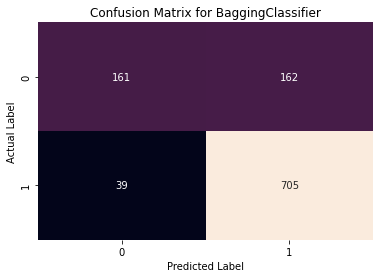

BG_train_precision  0.81
BG_train_recall  0.95
BG_train_f1  0.88


In [142]:
models_names={Bagging_model:'BaggingClassifier'}

print('Accuracy for {} model on Training set is'.format(models_names[Bagging_model]),'\n',round(accuracy_score(y_train,ytrain_predict_bagging),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[Bagging_model]),'\n',classification_report(y_train,ytrain_predict_bagging))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[Bagging_model]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_bagging),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[Bagging_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

BG_metrics=classification_report(y_train, ytrain_predict_bagging,output_dict=True)
df=pd.DataFrame(BG_metrics).transpose()
BG_train_f1=round(df.loc["1"][2],2)
BG_train_recall=round(df.loc["1"][1],2)
BG_train_precision=round(df.loc["1"][0],2)
print ('BG_train_precision ',BG_train_precision)
print ('BG_train_recall ',BG_train_recall)
print ('BG_train_f1 ',BG_train_f1)

AUC and ROC for the train data -Bagging

AUC: 0.882


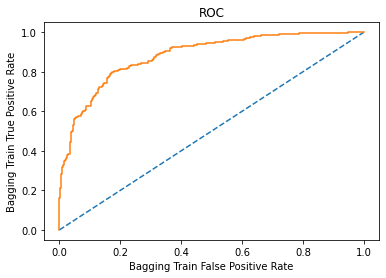

In [143]:
# predict probabilities
ytrain_predict_prob_bg=Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob_bg = ytrain_predict_prob_bg[:, 1]
# calculate AUC
BG_train_auc = roc_auc_score(y_train, ytrain_predict_prob_bg)
print('AUC: %.3f' % BG_train_auc)
# calculate roc curve
BG_train_fpr, BG_train_tpr, BG_train_thresholds = roc_curve(y_train, ytrain_predict_prob_bg)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BG_train_fpr, BG_train_tpr)
plt.xlabel('Bagging Train False Positive Rate')
plt.ylabel('Bagging Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - Bagging

Accuracy for BaggingClassifier model on Test set is 
 0.83


Classification report for BaggingClassifier model on Test set is 
               precision    recall  f1-score   support

           0       0.85      0.53      0.65       139
           1       0.82      0.96      0.89       319

    accuracy                           0.83       458
   macro avg       0.84      0.75      0.77       458
weighted avg       0.83      0.83      0.82       458



Confusion Matrix for BaggingClassifier model on Testing set is


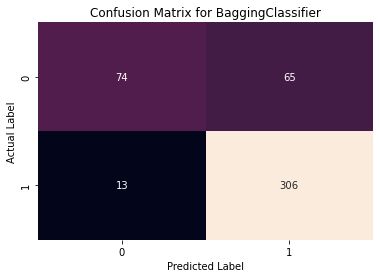

BG_test_precision  0.82
BG_test_recall  0.96
BG_test_f1  0.89


In [145]:
models_names={Bagging_model:'BaggingClassifier'}

print('Accuracy for {} model on Test set is'.format(models_names[Bagging_model]),'\n',round(accuracy_score(y_test,ytest_predict_bagging),3))
print('\n')
print('Classification report for {} model on Test set is'.format(models_names[Bagging_model]),'\n',classification_report(y_test,ytest_predict_bagging))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[Bagging_model]))
sns.heatmap(confusion_matrix(y_test,ytest_predict_bagging),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[Bagging_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

BG_metrics_test=classification_report(y_test, ytest_predict_bagging,output_dict=True)
df=pd.DataFrame(BG_metrics_test).transpose()
BG_test_f1=round(df.loc["1"][2],2)
BG_test_recall=round(df.loc["1"][1],2)
BG_test_precision=round(df.loc["1"][0],2)
print ('BG_test_precision ',BG_test_precision)
print ('BG_test_recall ',BG_test_recall)
print ('BG_test_f1 ',BG_test_f1)

AUC and ROC for the test data -Bagging

AUC: 0.898


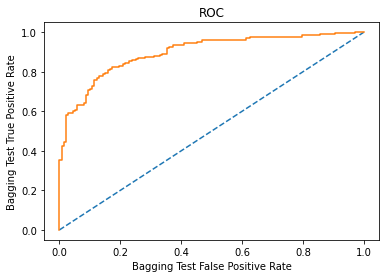

In [146]:
# predict probabilities
ytest_predict_prob_bg=Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob_bg = ytest_predict_prob_bg[:, 1]
# calculate AUC
BG_test_auc = roc_auc_score(y_test, ytest_predict_prob_bg)
print('AUC: %.3f' % BG_test_auc)
# calculate roc curve
BG_test_fpr, BG_test_tpr, BG_test_thresholds = roc_curve(y_test, ytest_predict_prob_bg)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BG_test_fpr, BG_test_tpr)
plt.xlabel('Bagging Test False Positive Rate')
plt.ylabel('Bagging Test True Positive Rate')
plt.title('ROC')
plt.show()

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Model Evaluation-Gradient Boosting

Training set - GB

Accuracy for GradientBoostingClassifier model on Training set is 
 0.915


Classification report for GradientBoostingClassifier model on Training set is 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       323
           1       0.92      0.96      0.94       744

    accuracy                           0.91      1067
   macro avg       0.91      0.89      0.90      1067
weighted avg       0.91      0.91      0.91      1067



Confusion Matrix for GradientBoostingClassifier model on Training set is


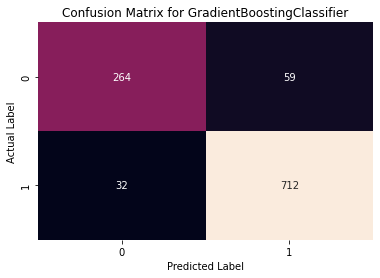

GB_train_precision  0.92
GB_train_recall  0.96
GB_train_f1  0.94


In [148]:
models_names={gbcl:'GradientBoostingClassifier'}

print('Accuracy for {} model on Training set is'.format(models_names[gbcl]),'\n',round(accuracy_score(y_train,ytrain_predict_GB),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[gbcl]),'\n',classification_report(y_train,ytrain_predict_GB))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[gbcl]))
sns.heatmap(confusion_matrix(y_train,ytrain_predict_GB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[gbcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

GB_metrics=classification_report(y_train, ytrain_predict_GB,output_dict=True)
df=pd.DataFrame(GB_metrics).transpose()
GB_train_f1=round(df.loc["1"][2],2)
GB_train_recall=round(df.loc["1"][1],2)
GB_train_precision=round(df.loc["1"][0],2)
print ('GB_train_precision ',GB_train_precision)
print ('GB_train_recall ',GB_train_recall)
print ('GB_train_f1 ',GB_train_f1)

AUC and ROC for the train data -GB

AUC: 0.964


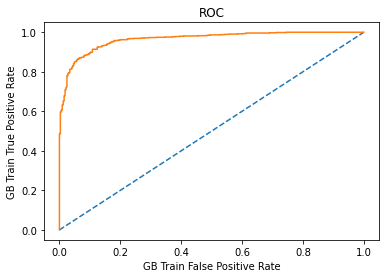

In [149]:
# predict probabilities
ytrain_predict_prob_GB=gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
ytrain_predict_prob_GB = ytrain_predict_prob_GB[:, 1]
# calculate AUC
GB_train_auc = roc_auc_score(y_train, ytrain_predict_prob_GB)
print('AUC: %.3f' % GB_train_auc)
# calculate roc curve
GB_train_fpr, GB_train_tpr, GB_train_thresholds = roc_curve(y_train, ytrain_predict_prob_GB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_train_fpr, GB_train_tpr)
plt.xlabel('GB Train False Positive Rate')
plt.ylabel('GB Train True Positive Rate')
plt.title('ROC')
plt.show()

Testing set - GB

Accuracy for GradientBoostingClassifier model on Test set is 
 0.845


Classification report for GradientBoostingClassifier model on Test set is 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



Confusion Matrix for GradientBoostingClassifier model on Testing set is


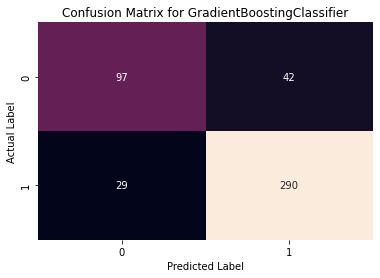

GB_test_precision  0.87
GB_test_recall  0.91
GB_test_f1  0.89


In [150]:
models_names={gbcl:'GradientBoostingClassifier'}

print('Accuracy for {} model on Test set is'.format(models_names[gbcl]),'\n',round(accuracy_score(y_test,ytest_predict_GB),3))
print('\n')
print('Classification report for {} model on Test set is'.format(models_names[gbcl]),'\n',classification_report(y_test,ytest_predict_GB))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[gbcl]))
sns.heatmap(confusion_matrix(y_test,ytest_predict_GB),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[gbcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

GB_metrics_test=classification_report(y_test, ytest_predict_GB,output_dict=True)
df=pd.DataFrame(GB_metrics_test).transpose()
GB_test_f1=round(df.loc["1"][2],2)
GB_test_recall=round(df.loc["1"][1],2)
GB_test_precision=round(df.loc["1"][0],2)
print ('GB_test_precision ',GB_test_precision)
print ('GB_test_recall ',GB_test_recall)
print ('GB_test_f1 ',GB_test_f1)

AUC and ROC for the test data -GB

AUC: 0.910


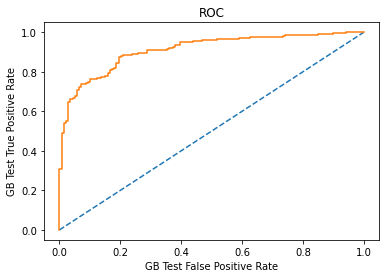

In [151]:
# predict probabilities
ytest_predict_prob_GB=gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
ytest_predict_prob_GB = ytest_predict_prob_GB[:, 1]
# calculate AUC
GB_test_auc = roc_auc_score(y_test, ytest_predict_prob_GB)
print('AUC: %.3f' % GB_test_auc)
# calculate roc curve
GB_test_fpr, GB_test_tpr, GB_test_thresholds = roc_curve(y_test, ytest_predict_prob_GB)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(GB_test_fpr, GB_test_tpr)
plt.xlabel('GB Test False Positive Rate')
plt.ylabel('GB Test True Positive Rate')
plt.title('ROC')
plt.show()

# Model Evaluation-Ada Boost

Training set - AdaBoost

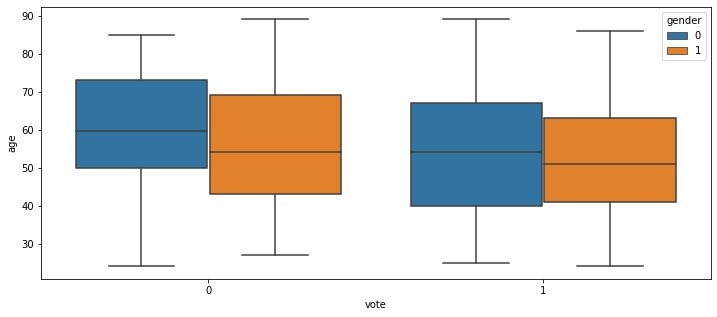

In [159]:
#Age vs Actual-Vote and hue=Gender:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=X_test['age'],hue=X_test['gender'],x=y_test,ax=ax)
plt.show()

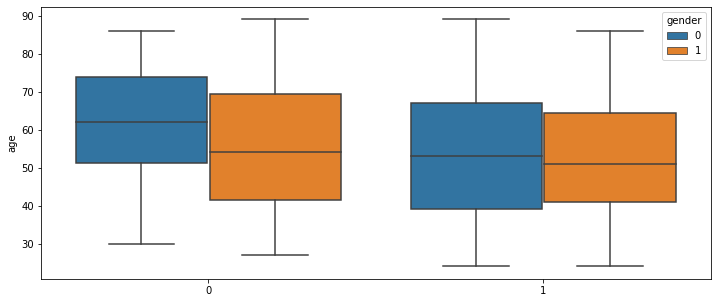

In [160]:
#Age vs Gender and hue=vote-predicted:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=X_test['age'],hue=X_test['gender'],x=ytest_predict_NB,ax=ax)
plt.show()

By comparing recall score and precision score of all the models, Gaussian Naïve Bayes model performs well in predicting labour or conservative party.
The test data recall of Naïve Bayes is 90% i.e only 10% of the people who is in favour of labour party, automatically he or she will be voting against the labour party.
The test data precision of Naïve Bayes is 88% i.e only 12% of the people were made false predictions that the votes to be in favour were actually predicted against the labour party.

# Problem Statement-2 Text Analytics¶

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1) President Franklin D. Roosevelt in 1941

2) President John F. Kennedy in 1961

3) President Richard Nixon in 1973

In [162]:
# Import Neccessary package
import os


# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np 
import pandas as pd 

# For Visualisation import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns

import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

In [163]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Speech_1 = inaugural.raw('1941-Roosevelt.txt')
Speech_2 = inaugural.raw('1961-Kennedy.txt')
Speech_3 = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to C:\Users\Neha
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [164]:
Speech_1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [165]:
Speech_2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [166]:
Speech_3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [167]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Neha
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [168]:
#To find the number of characters,words and sentences:
speech = ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']
for fileid in speech:
    num_chars = len(inaugural.raw(fileid))
    num_words = len(inaugural.words(fileid))
    num_sents = len(inaugural.sents(fileid))
    print(pd.DataFrame({fileid:[num_chars,num_words,num_sents]},index=['Character','Words','Sentences']))

           1941-Roosevelt.txt
Character                7571
Words                    1536
Sentences                  68
           1961-Kennedy.txt
Character              7618
Words                  1546
Sentences                52
           1973-Nixon.txt
Character            9991
Words                2028
Sentences              69


In [169]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Neha
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 2.2 Remove all the stopwords from the three speeches.

In [170]:
#Add Special character '--' to the existing punctuation
special_characters=['--'] + list(string.punctuation)
# Assign stopwords and special characters to new variable
stop = stopwords.words('english') + special_characters
#Convert all the words to lowercase and store it in a new variables
all_words_speech1 = (w.lower() for w in inaugural.words(fileids='1941-Roosevelt.txt'))
all_words_speech2 = (w.lower() for w in inaugural.words(fileids='1961-Kennedy.txt'))
all_words_speech3 = (w.lower() for w in inaugural.words(fileids='1973-Nixon.txt'))
#Remove stopwords and special characters for all the three speeches
all_words_clean_speech1 = [word for word in all_words_speech1 if word not in stop]
all_words_clean_speech2 = [word for word in all_words_speech2 if word not in stop]
all_words_clean_speech3 = [word for word in all_words_speech3 if word not in stop]

In [171]:
all_words_clean_speech1

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [172]:
all_words_clean_speech2

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [173]:
all_words_clean_speech3

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


# 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [174]:
# Most Frequent words in 1941-Roosevelt Speech
df1 = nltk.FreqDist(all_words_clean_speech1)
df1 = pd.DataFrame.from_dict(df1,orient='index')
df1 = df1.rename(columns={0:'Count'})
df1.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1941-Roosevelt Speech")
df1.head(5)

Most Frequent words in 1941-Roosevelt Speech


,Count
nation,12
know,10
spirit,9
democracy,9
life,9


In [175]:
# Most Frequent words in 1961-Kennedy Speech
df2 = nltk.FreqDist(all_words_clean_speech2)
df2 = pd.DataFrame.from_dict(df2,orient='index')
df2 = df2.rename(columns={0:'Count'})
df2.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1961-Kennedy Speech")
df2.head(5)

Most Frequent words in 1961-Kennedy Speech


,Count
let,16
us,12
sides,8
world,8
new,7


In [176]:
# Most Frequent words in 1973-Nixon Speech
df3 = nltk.FreqDist(all_words_clean_speech3)
df3 = pd.DataFrame.from_dict(df3,orient='index')
df3 = df3.rename(columns={'index':'Words',0:'Count'})
df3.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1973-Nixon Speech")
df3.head(5)

Most Frequent words in 1973-Nixon Speech


,Count
us,26
let,22
america,21
peace,19
world,18


# 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [177]:
wc_a = ' '.join(all_words_clean_speech1)
wc_b = ' '.join(all_words_clean_speech2)
wc_c = ' '.join(all_words_clean_speech3)
# Word Cloud for 1941-Roosevelt Speech

In [178]:
! pip install wordcloud

In [180]:
from wordcloud import WordCloud,STOPWORDS

Word Cloud for 1941-Roosevelt Speech (after cleaning)!!


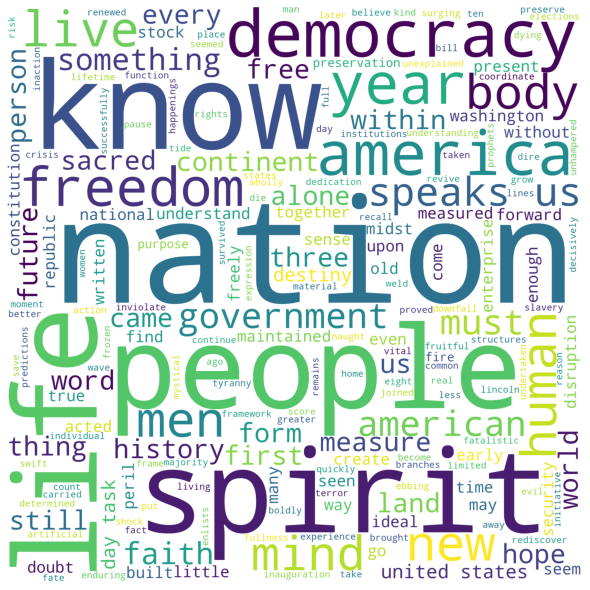

In [181]:
# Word Cloud for 1941-Roosevelt Speech

from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941-Roosevelt Speech (after cleaning)!!")
plt.show()

Word Cloud for 1961-Kennedy Speech (after cleaning)!!


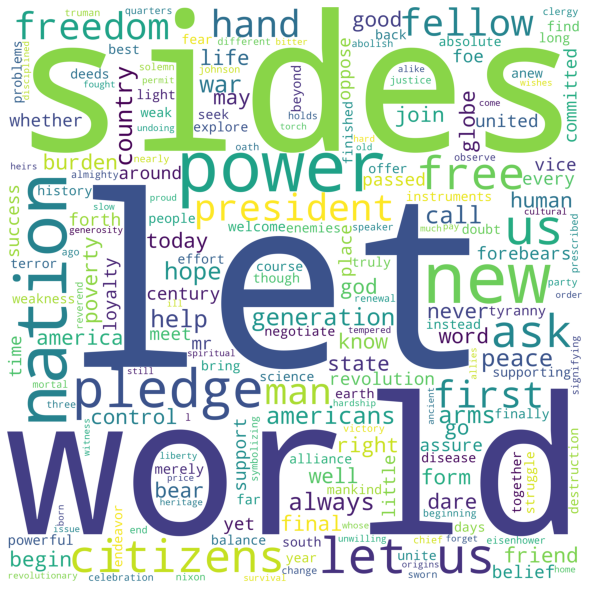

In [182]:
# Word Cloud for 1961-Kennedy Speech
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961-Kennedy Speech (after cleaning)!!")
plt.show()

Word Cloud for 1973-Nixon Speech (after cleaning)!!


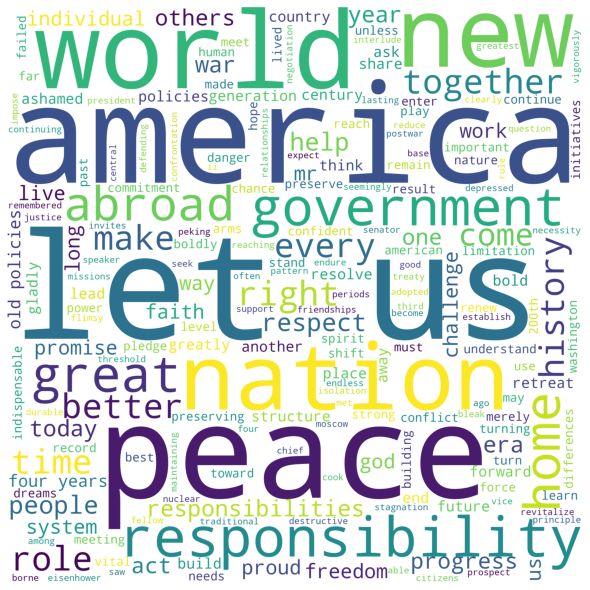

In [183]:
# Word Cloud for 1973-Nixon Speech
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973-Nixon Speech (after cleaning)!!")
plt.show()

# END